In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv(r'C:\Users\Aditya\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\train.csv')
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
#test data
test_data=pd.read_csv(r"C:\Users\Aditya\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\test.csv")
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
#checking shape of the data sets train and test

print('we have  {} rows and {} columns in our dataset'.format(train_data.shape[0],train_data.shape[1]))
print('\n')
print('we have  {} rows and {} columns in our dataset'.format(test_data.shape[0],test_data.shape[1]))


we have  159571 rows and 8 columns in our dataset


we have  153164 rows and 2 columns in our dataset


In [5]:
#id is unique for every record so it is not useful for us we can remove
train_data.drop('id',axis=1,inplace=True)
test_data.drop('id',axis=1,inplace=True)

In [6]:
test_data.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [8]:
train_data.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
test_data.isnull().sum()

comment_text    0
dtype: int64

<AxesSubplot:>

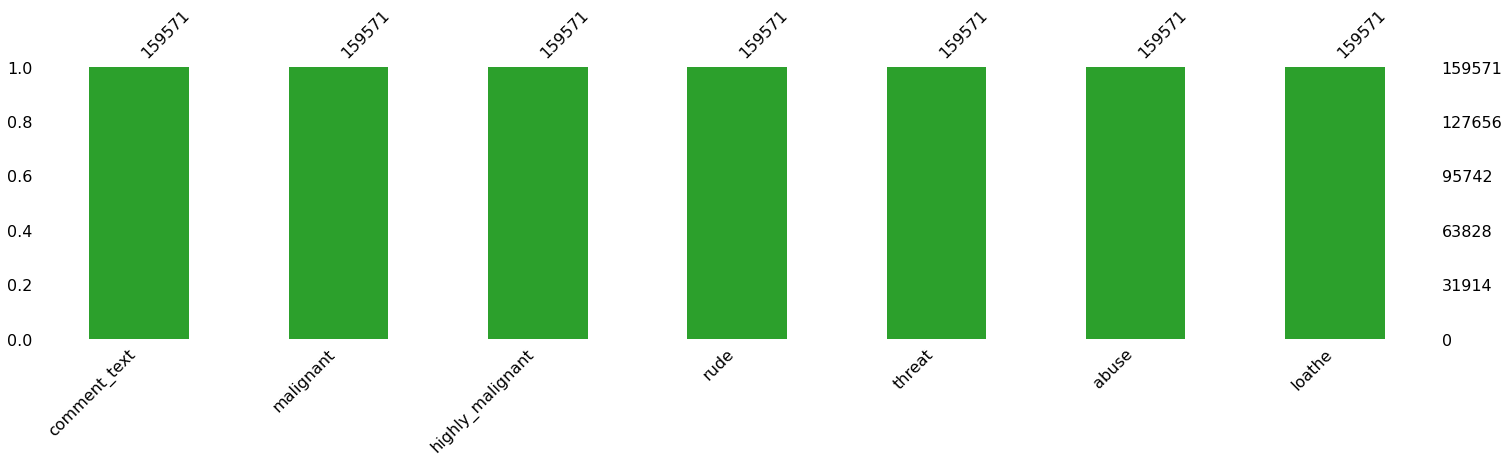

In [10]:
import missingno as msno
msno.bar(train_data, figsize = (25,5), color="tab:green")

In [11]:
#observation 
#no null values in the data we can see from above diagram

In [12]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = train_data.columns[1:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(train_data[train_data[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(train_data)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(train_data),1)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(train_data),1)}%)")

Total Malignant Comments: 16225 (10.2%)
Total Normal Comments: 143346 (89.8%)


above ratio shows that 10.2% of malignant comments and 89.8% normal comments so this clearly shows that our target column is imbalanced

In [13]:
#adding new column which indicates the length of the comment-text
df = train_data.copy()
df['original_length'] = df.comment_text.str.len()

# checking the first five and last five rows here
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


malignant


0    144277
1     15294
Name: malignant, dtype: int64


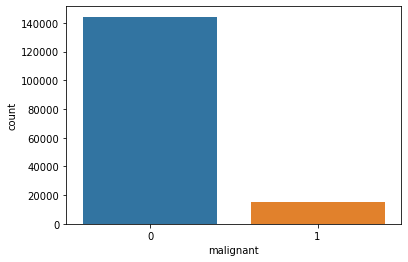

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


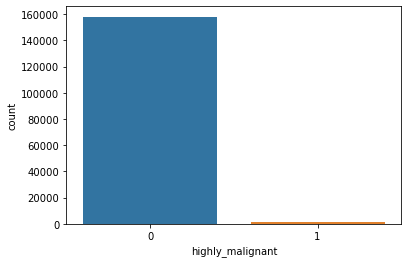

loathe


0    158166
1      1405
Name: loathe, dtype: int64


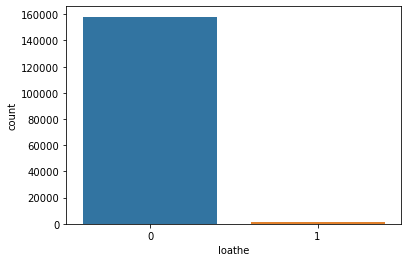

rude


0    151122
1      8449
Name: rude, dtype: int64


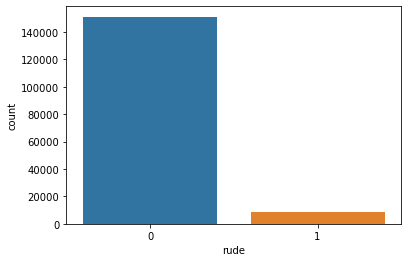

abuse


0    151694
1      7877
Name: abuse, dtype: int64


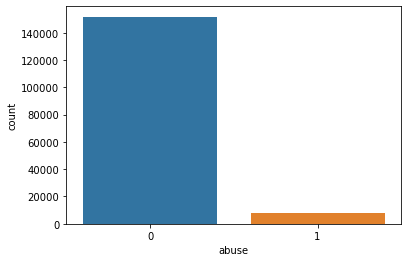

threat


0    159093
1       478
Name: threat, dtype: int64


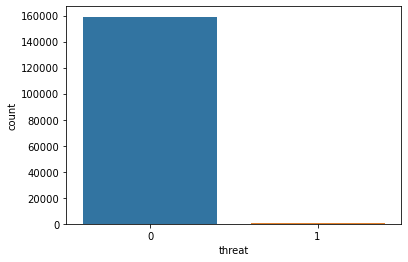

In [14]:
col_name=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col_name:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [15]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [16]:
#converting text into lower
df['comment_text'] = df['comment_text'].str.lower()

In [17]:
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [18]:
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')

In [19]:
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [20]:
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [21]:
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

In [22]:
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

In [23]:
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [24]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [25]:
def dictionary(dir):
    emails = [os.path.join(dir,f) for f in os.listdir(dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    
    return dictionary

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [28]:
df['clean_length'] = df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [29]:
print ('Original Length', df.original_length.sum())
print ('Clean Length', df.clean_length.sum())

Original Length 62893130
Clean Length 39966886


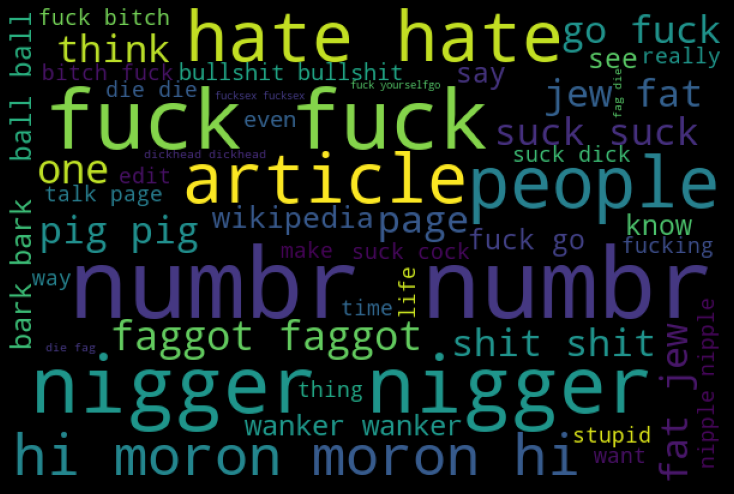

In [30]:
from wordcloud import WordCloud
highlym = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(highlym))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

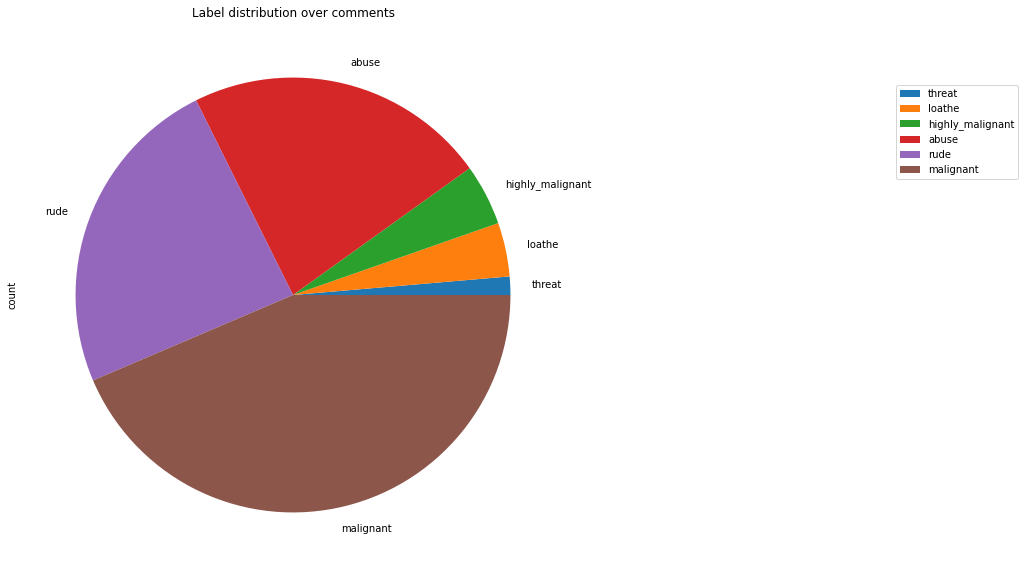

In [31]:
cols_output = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df[cols_output].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.6, 0.8))

In [32]:
target_data = df[cols_output]

df['bad'] =df[cols_output].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


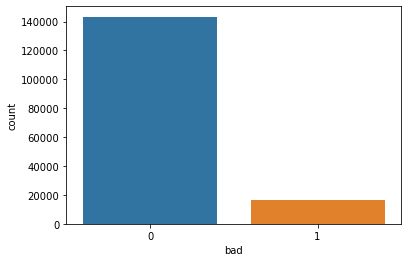

In [33]:
sns.countplot(x="bad" , data = df)
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [37]:
y_train.shape,y_test.shape

((127656,), (31915,))

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
df = DecisionTreeClassifier()

In [40]:
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
df.score(x_test,y_test)

0.9413128622904591

In [42]:
y_pred = df.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28671
           1       0.72      0.69      0.70      3244

    accuracy                           0.94     31915
   macro avg       0.84      0.83      0.84     31915
weighted avg       0.94      0.94      0.94     31915



In [47]:
cm=confusion_matrix(y_test,df.predict(x_test))
print(cm)

[[27807   864]
 [ 1009  2235]]


In [48]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
rf.score(x_test,y_test)

0.9575434748550838

In [50]:
y_pred = rf.predict(x_test)

In [51]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



In [53]:
cm=confusion_matrix(y_test,df.predict(x_test))
print(cm)

[[27807   864]
 [ 1009  2235]]


In [54]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [55]:
lm.score(x_test,y_test)

0.956258812470625

In [56]:
gb = GradientBoostingClassifier()

In [57]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [58]:
gb.score(x_test,y_test)

0.9413441955193482

In [60]:
y_pred = gb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28671
           1       0.96      0.44      0.60      3244

    accuracy                           0.94     31915
   macro avg       0.95      0.72      0.79     31915
weighted avg       0.94      0.94      0.93     31915



In [61]:
cm=confusion_matrix(y_test,df.predict(x_test))
print(cm)

[[27807   864]
 [ 1009  2235]]


In [62]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
ad.score(x_test,y_test)

0.9459188469371769

In [64]:
y_pred = ad.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28671
           1       0.88      0.54      0.67      3244

    accuracy                           0.95     31915
   macro avg       0.92      0.77      0.82     31915
weighted avg       0.94      0.95      0.94     31915



In [67]:
cm=confusion_matrix(y_test,ad.predict(x_test))
print(cm)

[[28438   233]
 [ 1493  1751]]


In [68]:
from sklearn import preprocessing, neighbors
clf = neighbors.KNeighborsClassifier()

In [69]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [70]:
clf.score(x_test,y_test)

0.9160896130346232

In [71]:
ET=ExtraTreesClassifier()

In [72]:
ET.fit(x_train,y_train)

ExtraTreesClassifier()

In [73]:
ET.score(x_test,y_test)

0.9575434748550838

In [74]:
y_pred = ET.predict(x_test) 

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



In [76]:
cm=confusion_matrix(y_test,ET.predict(x_test))
print(cm)

[[28335   336]
 [ 1019  2225]]


In [77]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)

[19:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgb.score(x_test,y_test)

0.9546921510261632

In [79]:
y_pred = xgb.predict(x_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.92      0.61      0.73      3244

    accuracy                           0.95     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [81]:
cm=confusion_matrix(y_test,xgb.predict(x_test))
print(cm)

[[28505   166]
 [ 1280  1964]]


In [83]:
test_df =tf_vec.fit_transform(test_data['comment_text'])
test_df

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [84]:
predict=rf.predict(test_df)
predict

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf, x, y, cv=10, scoring='accuracy').mean()

In [87]:
print('cross validation score :',cv*100)

cross validation score : 95.6451972776222


In [90]:
#save the model
import joblib
joblib.dump(rf,'comments.pkl')

['comments.pkl']